In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [2]:
x1 = [2104, 1416, 1532, 852, 1800, 2000, 1200, 950, 1600, 1100]
x2 = [5, 3, 3, 2, 4, 4, 2, 2, 3, 2]
x3 = [1, 2, 2, 1, 2, 1, 1, 1, 2, 1]
x4 = [45, 40, 30, 36, 42, 50, 35, 30, 48, 28]
y  = [460, 232, 315, 178, 380, 420, 200, 190, 350, 210]

X = np.array([x1, x2, x3, x4]).T
y = np.array(y).reshape(-1, 1)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
class SGDRegressor:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            epoch_loss = 0

            for i in range(n_samples):
                y_pred = np.dot(X[i], self.w) + self.b
                error = y[i] - y_pred

                dw = -2 * error * X[i]
                db = -2 * error

                self.w -= self.lr * dw
                self.b -= self.lr * db

                epoch_loss += error ** 2

            self.losses.append(epoch_loss / n_samples)

    def predict(self, X):
        return np.dot(X, self.w) + self.b


In [6]:
model = SGDRegressor(learning_rate=0.01, epochs=2000)
model.fit(X_train_scaled, y_train)


In [7]:
y_pred = model.predict(X_test_scaled)
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.29733160794865987


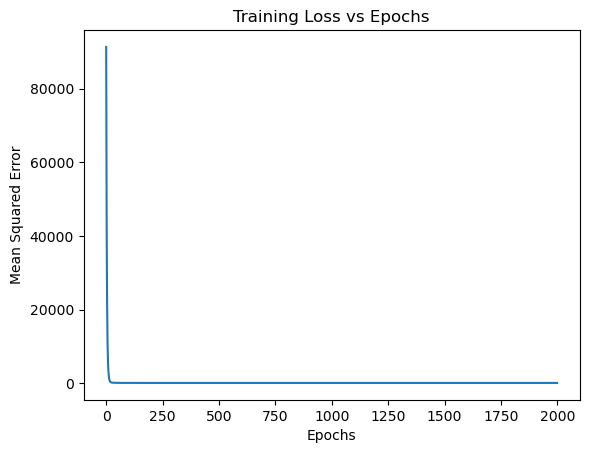

In [8]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Training Loss vs Epochs")
plt.show()
